### Decision Tree Classifier - Iris Species Classification

In this Notebook, we will solve a simple problem for demonstrating Decision Tree Classifier Machine Learning Model. 

##### Challenge Description
This is the link for the [Iris Flower_Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) on Wiki that we are building a model for. In short, this is about Classifying the Iris flower to one of it's 3 possible species (Setosa, Virginica, Versicolor) on the basis of Flower features like Sepal legth, Sepal Width, Petal Length and Petal Width. The model is expected to learn from the data provided and predict the right sepcies for new flower data to assist the farming with the right classification.

**Decision Trees** are non-parametric supervised machine learning models used for  for Predictive model building in Classification and Regression problems. This basically works by dividing the list of samples into smaller groups based on some favourable conditions on features that helps to accurately and efficiently classify the inputs and also to predict continuous variables. (Source - [Scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

In this exercise, we will **1. Explore** the Iris data set, **2. Visualize** the data, and **3. Build a Decision Tree** with various hyper options. We will observe how different options behave on the data set, while also measuring the **4. performance with Metrics like like Accuracy Score, Confusion Matrix**. 

Hope you will find this useful. Give it a Thumbs up if you like it.

In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# For Train/Test Data division and 
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# For Visualization of Tree and exporting to PDF formats
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
# We need to install a third party graphviz python library that exports and renders the Decision trees pictorially
# We should also install the OS level system package for graphviz in respective Package repos.
# Follow this link - https://graphviz.org/download/ for the same
# !pip install graphviz

In [61]:
# Load and Explore the Iris Dataset and it's attributes. 
iris = load_iris()
print(dir(iris))
"""
print(iris['filename'])
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)
print(iris.data)
print(iris.target)
"""

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


"\nprint(iris['filename'])\nprint(iris.feature_names)\nprint(iris.target_names)\nprint(iris.DESCR)\nprint(iris.data)\nprint(iris.target)\n"

In [8]:
# Loading the Data and Target arrays and transform them as DataFrames for visualization purposes
X = iris.data
y = iris.target
X_data = pd.DataFrame(iris.data,columns=iris.feature_names)
y_data = pd.DataFrame(iris.target,columns=["Species"])

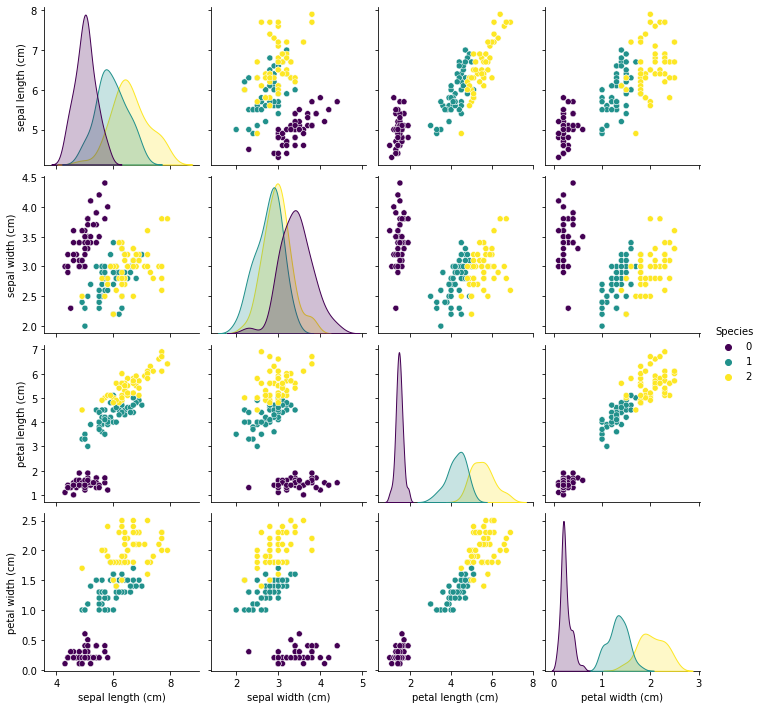

In [9]:
# From the Pairwise Features visualization against Species as Hue, we can understand
# There are some combinations that can better divide or classify the data based on their thresholds.
# Example - Sepal Length & Petal Length as one combination. Another clean decisions can be inferred for 
# Petal length vs Petal width as can be seen from the Graph. This is what the Algorithm will infer with
# Statistically supporting loss functions and future builds a model. For us, this gives confidence to move ahead with this data.
import seaborn as sns
from matplotlib import pyplot as plt
full_df = pd.concat([X_data,y_data], axis=1)
sns.pairplot(full_df, hue='Species', palette='viridis')
plt.show()

In [10]:
# Split the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.25, random_state=30)


[Text(186.0, 201.90857142857143, 'petal length (cm) <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [38, 39, 35]'),
 Text(148.8, 170.84571428571428, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(223.20000000000002, 170.84571428571428, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 74\nvalue = [0, 39, 35]'),
 Text(186.0, 139.78285714285715, 'petal length (cm) <= 5.35\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(148.8, 108.72, 'sepal length (cm) <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(74.4, 77.65714285714284, 'petal length (cm) <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(37.2, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(111.60000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 77.65714285714284, 'petal length (cm) <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(186.0, 46.59428571428572, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 

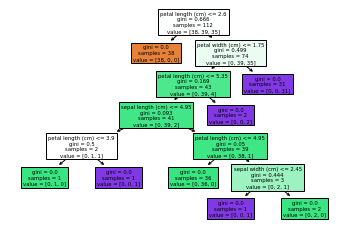

In [62]:
# Now, train & fit a Decision Tree Model with "DecisionTreeClassifier" object passing simple and default parameters
# Usually, gini is the default criterion; and min samples for split is also two. That's the deepest we can go up to.
# pplot_tree can textually describe the tree and also prints a visual graph inline in the Inotebook here below.
# Next steps, we can export this using some cool libraries to an external PDF
clf_gini_min_samp_2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2)
clf_gini_min_samp_2.fit(X_train,y_train)
tree.plot_tree(clf_gini_min_samp_2, filled=True, feature_names=iris.feature_names)

In [19]:
# Let's now test the classifier with test data set and check performance
# Here, we used accuracy_score that indicates overall accuracy. Besides that, we use Confusion Matrix
# A Confusion Matrix prints accuracy of predictions for each class of output as 2X2 Matrix of 
# True Positive, False Positive (1st row) folowed by False Positive, True Negative in second row.
y_pred = clf_gini_min_samp_2.predict(X_test)
print("Accuracy Score of the model is: ", accuracy_score(y_test,y_pred))
multilabel_confusion_matrix(y_test,y_pred)


Accuracy Score of the model is:  0.9736842105263158


array([[[26,  0],
        [ 0, 12]],

       [[27,  0],
        [ 1, 10]],

       [[22,  1],
        [ 0, 15]]])

In [63]:
# An utility Method that exports the tree of a Classifier model object built, into the given file name
# Further, we are caling this method below for various model objects built
def render_pdf(classifier, filename):
    dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(filename)
    
render_pdf(clf_gini_min_samp_2,'iris_rendered_pdf')

In [50]:
# Let's tweak one important parameter called max_depth that is very helpful to control overfitting the tree too specific
# to training data, in which case the model may not perform well for testing data. To control overfitting,
# we can use sevaral parameters like max_depth, min_samples_split etc.. Here, we will use max_depth and observe it's behavior
clf_gini_max_depth_2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_gini_max_depth_3 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini_max_depth_2.fit(X,y)
clf_gini_max_depth_3.fit(X,y)
render_pdf(clf_gini_max_depth_2,'clf_gini_max_depth_2')
render_pdf(clf_gini_max_depth_3,'clf_gini_max_depth_3')

In [64]:
# Now, let's Predict the values for both these trees of depths 2 and 3, and understand difference in performance
y_pred_d2 = clf_gini_max_depth_2.predict(X_test)
y_pred_d3 = clf_gini_max_depth_3.predict(X_test)
print("Accuracy Score of the model for Depth2 Tree: ", accuracy_score(y_test,y_pred_d2))
print("Confusion Matrix for the Depth-2 Tree is:\n")
print(multilabel_confusion_matrix(y_test,y_pred_d2))
print("Accuracy Score of the model for Depth3 Tree: ", accuracy_score(y_test,y_pred_d3))
print("Confusion Matrix for the Depth-3 Tree is:\n")
multilabel_confusion_matrix(y_test,y_pred_d3)

Accuracy Score of the model for Depth2 Tree:  0.9473684210526315
Confusion Matrix for the Depth-2 Tree is:

[[[26  0]
  [ 0 12]]

 [[26  1]
  [ 1 10]]

 [[22  1]
  [ 1 14]]]
Accuracy Score of the model for Depth3 Tree:  0.9736842105263158
Confusion Matrix for the Depth-3 Tree is:



array([[[26,  0],
        [ 0, 12]],

       [[27,  0],
        [ 1, 10]],

       [[22,  1],
        [ 0, 15]]])

In [52]:
# Side by side commaring predictions of depth-2, depth-3 trees along side actual test value.
# Well, that's all I had for this video. Hope you have learnt something from it. Feel free to experiemt and share this code.
df = pd.DataFrame(np.array([y_test['Species'].values, y_pred_d2, y_pred_d3]).T, columns=["Actual", "Depth-2", "Depth-3"])

,Actual,Depth-2,Depth-3
0,0,0,0
1,0,0,0
2,0,0,0
3,2,2,2
4,1,1,1
5,1,1,1
6,2,2,2
7,2,2,2
8,1,1,1
9,2,2,2
